Лабораторная работа 2. Определение типа стекла

1. Понимание данных: в лабораторной используется Glass Identification Dataset – это классический датасет, используемый для задач классификации в машинном обучении. Он содержит химические свойства различных образцов стекла и их принадлежность к определённому классу. Датасет был создан для криминалистических исследований и помогает определить тип стекла на основе его состава.

2. Предварительная обработка: масштабирование, разделение данных на
обучающие и тестовые.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# загружаем датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df = pd.read_csv(url, names=columns, index_col=0)

# разделяем признаки и целевую переменную
X = df.drop(columns=["Type"])
y = df["Type"]


In [5]:
# разделяем на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Обучение классификаторов: логистическая регрессия, SVM, k-ближайших соседей,
случайный лес, градиентный бустинг.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Словарь моделей
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "SVM": SVC(kernel="rbf", class_weight="balanced", random_state=42),
    "Метод k-ближайших соседей": KNeighborsClassifier(n_neighbors=7),
    "Случайный лес": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "Градиентный бустинг": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


4. Сравнение производительности моделей: точность, матрица ошибок.


🔹 Логистическая регрессия 🔹
Accuracy: 0.5813953488372093
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.67      0.27      0.38        15
           3       0.20      0.67      0.31         3
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.60      0.75      0.62        43
weighted avg       0.67      0.58      0.58        43


🔹 SVM 🔹
Accuracy: 0.6976744186046512
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.77      0.67      0.71        15
           3       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.5

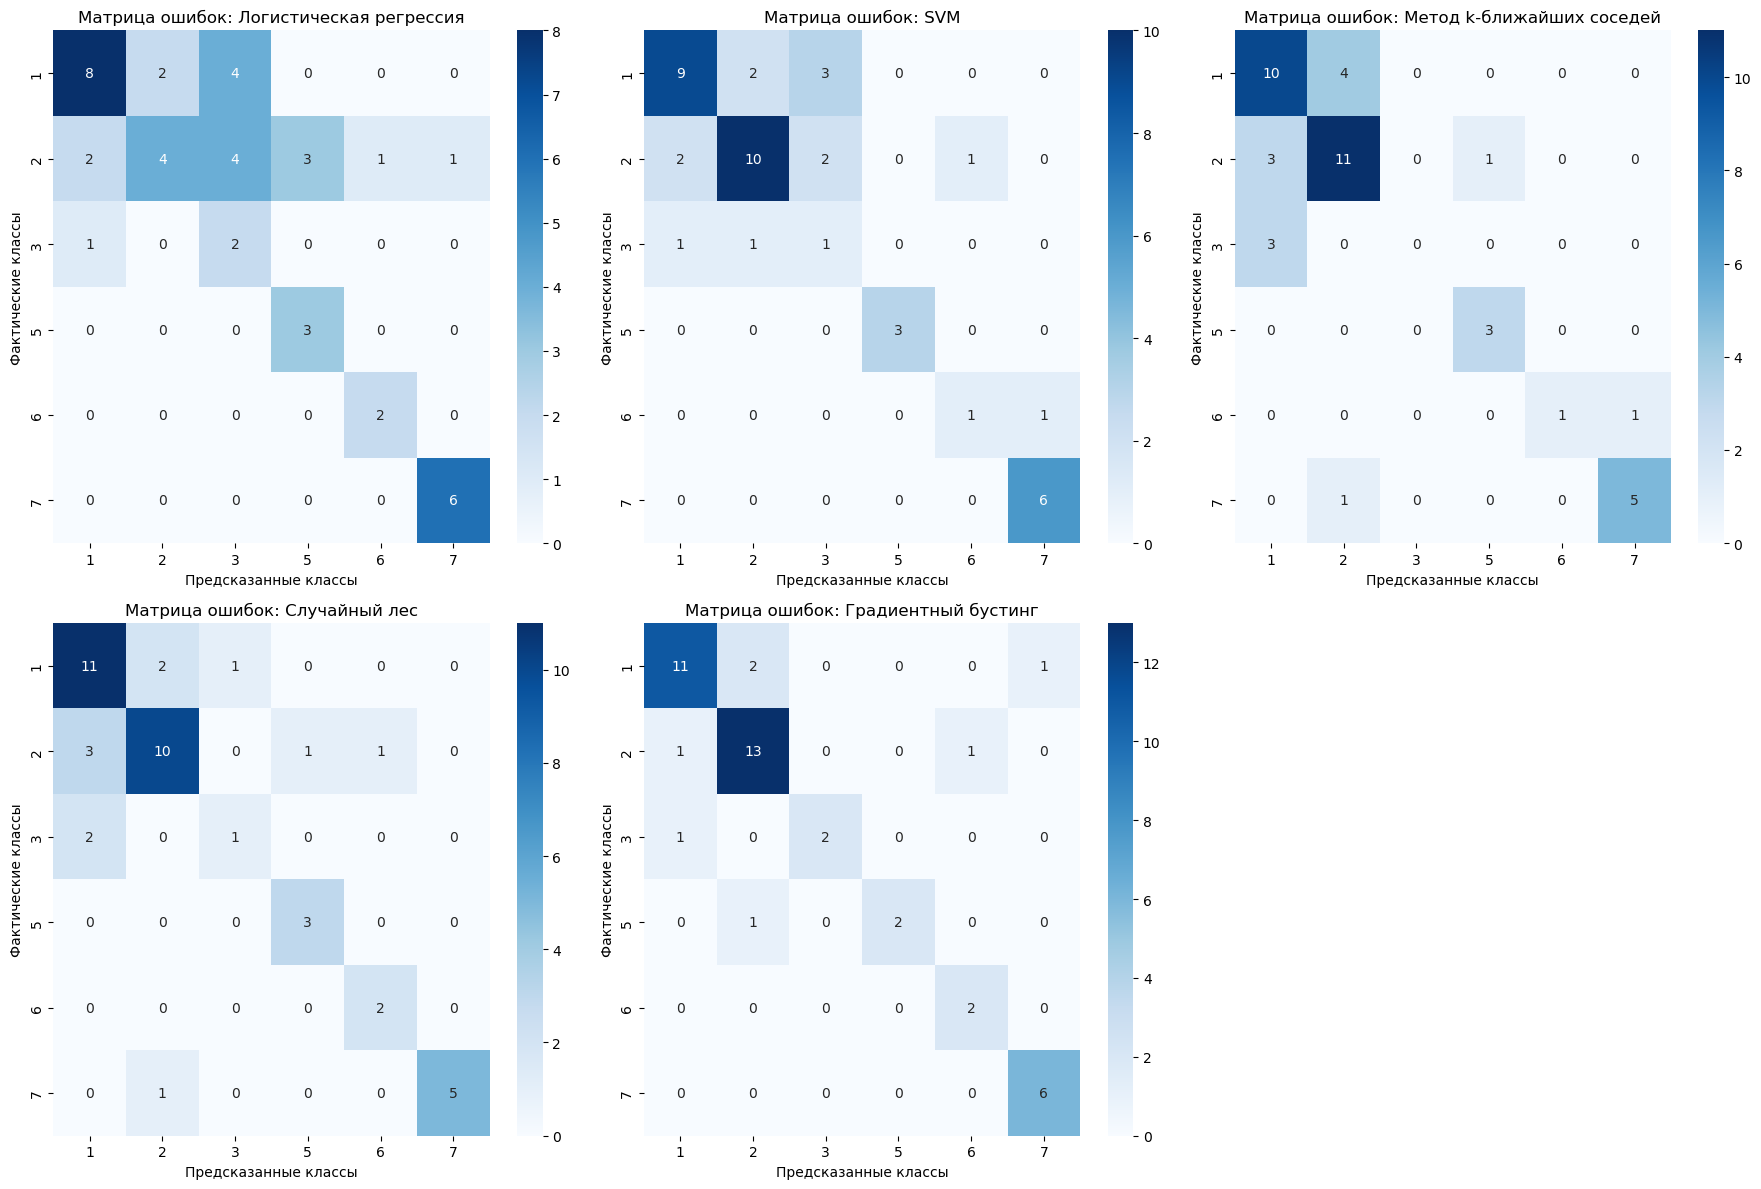

In [10]:
# Обучаем и оцениваем модели
results = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # обучение
    y_pred = model.predict(X_test_scaled)  # предсказание
    
    # Точность
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Матрица ошибок
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


# Отрисовываем матрицы для моделей
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
axes = axes.flatten()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique(), ax=axes[idx])
    axes[idx].set_title(f"Матрица ошибок: {name}")
    axes[idx].set_xlabel("Предсказанные классы")
    axes[idx].set_ylabel("Фактические классы")

for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Результаты: 
    
    Логистическая регрессия показала наименее точные результаты среди всех моделей. Хотя она относительно хорошо классифицирует основные классы (например, классы 1 и 7), для других классов, особенно класса 3, наблюдается низкая точность и полнота. 
    
    Метод опорных векторов показал значительное улучшение по сравнению с логистической регрессией, особенно в классификации классов 1 и 2. Однако у него все еще есть сложности с редкими классами (например, класс 3).
    
    Метод k-ближайших соседей продемонстрировал более высокий результат, чем SVM. Однако для редких классов (например, 3 и 6) полнота остается низкой, что говорит о том, что модель не всегда находит корректные ближайшие соседи для малочисленных классов.
    
    Случайный лес показал себя как один из более стабильных алгоритмов, обеспечивая хорошую точность и баланс между precision и recall. 
    
    Градиентный бустинг продемонстрировал лучший результат среди всех моделей, обеспечив высокую точность и полноту. Он хорошо классифицирует основные классы и даже редкие классы (например, 3 и 6), показывая, что модель лучше адаптируется к сложности данных.


5. Изучение и подбор гиперпараметров: сравним методы GridSearchCV и
RandomizedSearchCV на модели Случайного леса

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Параметры для RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(10, 201),  # Случайный выбор числа деревьев
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)  # Случайный выбор минимального числа для разделения
}

# Сравнение GridSearchCV и RandomizedSearchCV для случайного леса
# 1. GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"GridSearchCV - лучшие параметры: {grid_search.best_params_}")
print(f"GridSearchCV - лучшая точность на обучающем наборе: {grid_search.best_score_}")

# Оценка на тестовом наборе
best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test_scaled)
print(f"GridSearchCV - точность на тестовом наборе: {accuracy_score(y_test, y_pred_grid)}")

# 2. RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions, n_iter=10,
                                   cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print(f"RandomizedSearchCV - лучшие параметры: {random_search.best_params_}")
print(f"RandomizedSearchCV - лучшая точность на обучающем наборе: {random_search.best_score_}")

# Оценка на тестовом наборе
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test_scaled)
print(f"RandomizedSearchCV - точность на тестовом наборе: {accuracy_score(y_test, y_pred_random)}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
GridSearchCV - лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
GridSearchCV - лучшая точность на обучающем наборе: 0.7956302521008404
GridSearchCV - точность на тестовом наборе: 0.8604651162790697
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV - лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 67}
RandomizedSearchCV - лучшая точность на обучающем наборе: 0.7779831932773109
RandomizedSearchCV - точность на тестовом наборе: 0.813953488372093


Результат: GridSearchCV нашел модель с гиперпараметрами, которые обеспечили более высокую точность на тестовом наборе (86.05%) по сравнению с RandomizedSearchCV (81.40%), поскольку он проверяет все возможные комбинации гиперпараметров, а не случайно выбирает их. Однако стоит отметить, что GridSearchCV занял больше времени, так как он проверяет все возможные комбинации, в то время как RandomizedSearchCV работает быстрее, но может найти немного менее точные гиперпараметры.

6. Визуализация данных: корреляционная матрица и важность признаков

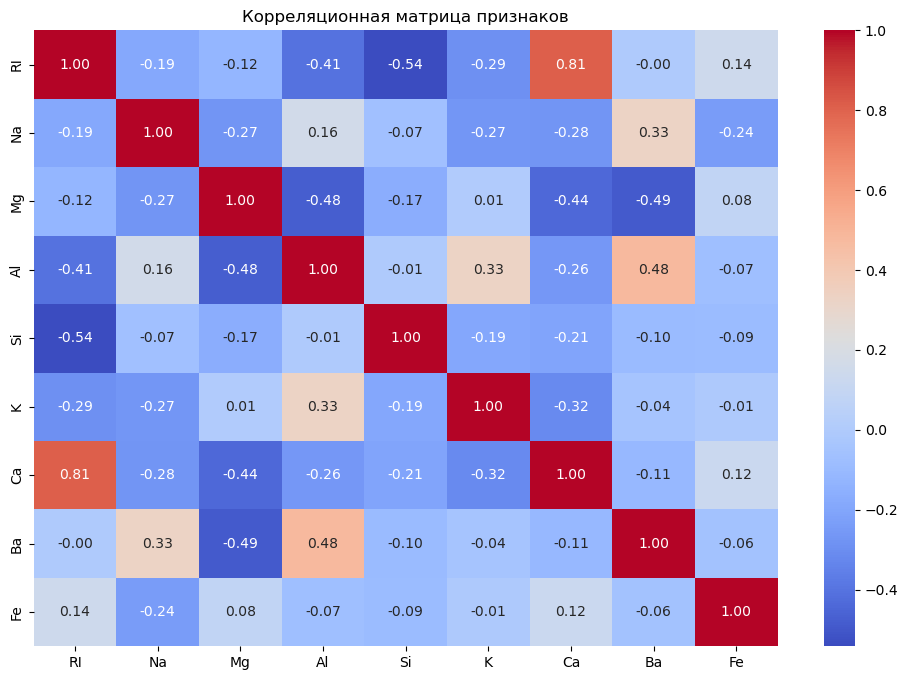

In [16]:
# Рассчитываем корреляционную матрицу для исходных данных
corr_matrix = X.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

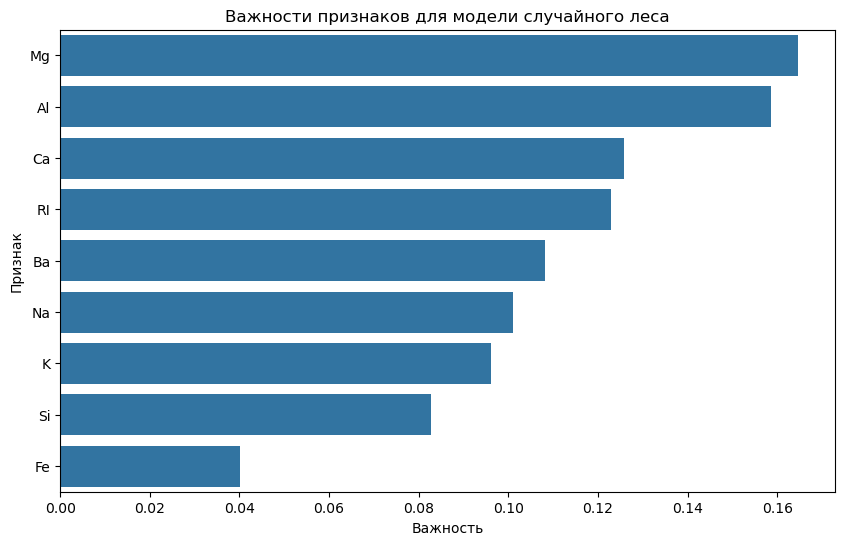

In [17]:
# Важности признаков для случайного леса 
importances = best_rf_grid.feature_importances_

feature_importance_df = pd.DataFrame({
    'Признак': X.columns,
    'Важность': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=feature_importance_df)
plt.title("Важности признаков для модели случайного леса")
plt.show()


Результаты: 

Корреляционная матрица используется при анализе данных перед обработкой, она представляет общую картину данных и их взаимосвязи. Сильные зависимости (RI-Ca, Si-RI) могут указывать на возможность исключения одного из признаков для снижения мультиколлинеарности. В то же время, низкая корреляция Na с другими элементами может означать, что он несет самостоятельную информацию в данных.

Важности признаков были рассчитаны для случайного леса. Модель случайного леса оценивает значимость каждого признака на основе того, насколько он уменьшает неопределенность (энтропию) при разбиении данных. Основное влияние на классификацию оказывают Mg, Al, Ca и RI, они играют решающую роль при определении типа стекла.